In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import json

FILES_DIR = "/home/blagojce/EPFL_semester3/NTDS/ntds_project/ml-100k"

<b>u.data</b>    -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC 

In [2]:
df_data_path = os.path.join(FILES_DIR, "u.data")
df_data = pd.read_csv(df_data_path, header=None, delimiter="\t")
df_data.columns = ["user_id", "item_id", "rating", "timestamp"]
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], unit='s')

In [3]:
print("Unique users: %d" % len(df_data["user_id"].unique()))
print("Unique movies: %d" % len(df_data["item_id"].unique()))
print("Distinct ratings: %s" % sorted(df_data["rating"].unique()))

Unique users: 943
Unique movies: 1682
Distinct ratings: [1, 2, 3, 4, 5]


In [4]:
df_data["rating"].hist()

<b>u.info</b> <b>USELESS</b>     -- The number of users, items, and ratings in the u data set.

In [5]:
df_info_path = os.path.join(FILES_DIR, "u.info")
df_info = pd.read_csv(df_info_path, header=None, delimiter="\t")

In [6]:
df_info

,0
0,943 users
1,1682 items
2,100000 ratings


<b>u.item</b>     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.


In [7]:
df_item_path = os.path.join(FILES_DIR, "u.item")
df_item = pd.read_csv(df_item_path, header=None, delimiter="|", encoding='latin1')
df_item.columns = ["item_id" , "movie_title" , "release_date" , "video_release_date" , "IMDb_URL" , "unknown" , "Action" , "Adventure" , "Animation" , "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" , "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" , "Thriller" , "War" , "Western"]
df_item = df_item.drop(columns= ["video_release_date"]) # evey value is NaN

In [8]:
df_item.head()

,item_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<b>u.genre</b>    -- A list of the genres.

In [9]:
df_genre_path = os.path.join(FILES_DIR, "u.genre")
df_genre = pd.read_csv(df_genre_path, header=None, delimiter="|")
df_genre

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


<b>u.user</b>     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

In [10]:
df_user_path = os.path.join(FILES_DIR, "u.user")
df_user = pd.read_csv(df_user_path, header=None, delimiter="|")
df_user.columns = ["user_id", "age", "gendre", "occupation", "zip_code"]
df_user.head()

,user_id,age,gendre,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


<b>COMMENT</b> Only thing we could do with the user data is to aggregate the zip_codes, instead of zip_codes, to find cities or states, and use them as additional simmilarity information in the users graph. And, also merge the occupation none with occupation other?

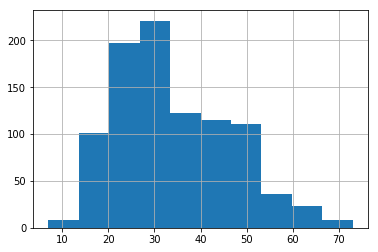

In [11]:
df_user["age"].hist()

<b>u.occupation</b> -- A list of the occupations.

In [12]:
df_occupation_path = os.path.join(FILES_DIR, "u.occupation")
df_occupation = pd.read_csv(df_occupation_path, header=None, delimiter="|")
df_occupation

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


<b>To je to</b> There are some already done train/test splits in the data directory, like for 5 fold cross validadtion, etc.

In [13]:
import urllib
import json
serviceurl = 'http://www.omdbapi.com/?'
omdbapi = "123b5018"
apikey = '&apikey='+omdbapi

In [14]:
def search_movie(title):
    if len(title) < 1 or title=='quit': 
        print("Goodbye now…")
        return None
    try:
        url = serviceurl + urllib.parse.urlencode({'t': title})+apikey
        print(f'Retrieving the data of "{title}" now… ')
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)

        if json_data['Response']=='True':
            print(json_data)
        return json_data
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")
        return None

In [15]:
def search_movie_title_year(title, year):
    if len(title) < 1 or title=='quit': 
        print("Goodbye now…")
        return None
    try:
        url = serviceurl + urllib.parse.urlencode({'t': title}, {'year': year})+apikey
        print(f'Retrieving the data of "{title}" now… ')
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)

        if json_data['Response']=='True':
            print(json_data)
        return json_data
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")
        return None

In [16]:
# title and years to download
movie_titles = [(x.rsplit(" ", 1)[0], x.rsplit(" ", 1)[1]) for x in list(df_item["movie_title"]) if x != "unknown"]

In [17]:
# after many attemps and hand downloading the missing data we obtained the following metadata
with open('oimdb_metadata_crawled.pickle', 'rb') as handle:
    oimdb_metadata = pickle.load(handle)
    
oimdb_metadata = [m[1] for m in oimdb_metadata]
df_oimdb_metadata = pd.read_json(json.dumps(oimdb_metadata))

In [18]:
df_oimdb_metadata

,Actors,Awards,BoxOffice,Country,DVD,Director,Episode,Genre,Language,Metascore,...,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,seriesID,totalSeasons
0,"Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",Nominated for 2 BAFTA Film Awards. Another 2 w...,N/A,"UK, USA",19 Oct 1999,Martin Campbell,NaN,"Action, Adventure, Thriller","English, Russian, Spanish",65,...,GoldenEye,movie,N/A,"Ian Fleming (characters), Michael France (stor...",1995,tt0113189,7.2,"225,957",NaN,NaN
1,"Sammi Davis, Amanda De Cadenet, Valeria Golino...",1 win & 1 nomination.,N/A,USA,20 Apr 1999,"Allison Anders, Alexandre Rockwell, Robert Rod...",NaN,Comedy,English,N/A,...,Four Rooms,movie,N/A,"Allison Anders, Alexandre Rockwell, Robert Rod...",1995,tt0113101,6.8,"92,819",NaN,NaN
2,"John Travolta, Gene Hackman, Rene Russo, Danny...",Won 1 Golden Globe. Another 5 wins & 15 nomina...,N/A,USA,27 Aug 1997,Barry Sonnenfeld,NaN,"Comedy, Crime, Thriller",English,82,...,Get Shorty,movie,N/A,"Elmore Leonard (novel), Scott Frank (screenplay)",1995,tt0113161,6.9,"71,974",NaN,NaN
3,"Sigourney Weaver, Holly Hunter, Dermot Mulrone...",2 wins & 1 nomination.,N/A,USA,28 Apr 1998,Jon Amiel,NaN,"Drama, Mystery, Thriller",English,54,...,Copycat,movie,N/A,"Ann Biderman, David Madsen",1995,tt0112722,6.6,"50,845",NaN,NaN
4,"Keith Fulton, Terry Gilliam, Charles Roven, Ll...",N/A,N/A,USA,18 Feb 1997,"Keith Fulton, Louis Pepe",NaN,Documentary,English,N/A,...,The Hamster Factor and Other Tales of Twelve M...,movie,N/A,"Keith Fulton, Louis Pepe",1996,tt0116479,7.6,893,NaN,NaN
5,"Christine Cavanaugh, Miriam Margolyes, Danny M...",Won 1 Oscar. Another 18 wins & 23 nominations.,N/A,"Australia, USA",23 Sep 2003,Chris Noonan,NaN,"Comedy, Drama, Family",English,83,...,Babe,movie,N/A,"Dick King-Smith (novel), George Miller (screen...",1995,tt0112431,6.7,"110,817",NaN,NaN
6,"Susan Sarandon, Sean Penn, Robert Prosky, Raym...",Won 1 Oscar. Another 20 wins & 19 nominations.,N/A,"UK, USA",30 Sep 1998,Tim Robbins,NaN,"Crime, Drama",English,80,...,Dead Man Walking,movie,N/A,"Helen Prejean (book), Tim Robbins",1995,tt0112818,7.5,"84,009",NaN,NaN
7,"Christopher Bowen, Edward Jewesbury, Ian McKel...",Nominated for 2 Oscars. Another 7 wins & 10 no...,N/A,"UK, USA",15 Aug 2001,Richard Loncraine,NaN,"Drama, Sci-Fi, War",English,N/A,...,Richard III,movie,N/A,"William Shakespeare (play), Ian McKellen, Rich...",1995,tt0114279,7.4,"13,051",NaN,NaN
8,"Pamela Blair, Rene Ceballos, Elie Chaib, Georg...",Won 1 Oscar. Another 11 wins & 11 nominations.,N/A,USA,16 Mar 1999,Woody Allen,NaN,"Comedy, Fantasy, Romance","English, Latin",59,...,Mighty Aphrodite,movie,N/A,Woody Allen,1995,tt0113819,7.0,"36,236",NaN,NaN
9,"Richard Dreyfuss, Glenne Headly, Jay Thomas, O...",Nominated for 1 Oscar. Another 5 wins & 4 nomi...,N/A,USA,24 Aug 1999,Stephen Herek,NaN,"Drama, Music","English, American Sign Language",59,...,Mr. Holland's Opus,movie,N/A,Patrick Sheane Duncan,1995,tt0113862,7.3,"33,909",NaN,NaN


df_oimdb_metadata.isna().any():<br>
DVD              True - may be useful, because there are not much nan values<br>
Production       True - may be useful, because there are not much nan values<br>

BoxOffice        True - useles, almost every value is nan<br>
Episode          True - useles, almost every value is nan<br>
Season           True - useles, almost every value is nan<br>
Website          True - useles, almost every value is nan<br>
seriesID         True - useles, almost every value is nan<br>
totalSeasons     True - useles, almost every value is nan<br>

In [19]:
df_oimdb_metadata.drop(["BoxOffice", "Episode", "Season", "Website", "seriesID", "totalSeasons"], axis=1, inplace=True)

In [20]:
df_oimdb_metadata

,Actors,Awards,Country,DVD,Director,Genre,Language,Metascore,Plot,Poster,...,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",Nominated for 2 BAFTA Film Awards. Another 2 w...,"UK, USA",19 Oct 1999,Martin Campbell,"Action, Adventure, Thriller","English, Russian, Spanish",65,When a deadly satellite weapon system falls in...,https://m.media-amazon.com/images/M/MV5BMzk2OT...,...,17 Nov 1995,True,130 min,GoldenEye,movie,"Ian Fleming (characters), Michael France (stor...",1995,tt0113189,7.2,"225,957"
1,"Sammi Davis, Amanda De Cadenet, Valeria Golino...",1 win & 1 nomination.,USA,20 Apr 1999,"Allison Anders, Alexandre Rockwell, Robert Rod...",Comedy,English,N/A,Four interlocking tales that take place in a f...,https://m.media-amazon.com/images/M/MV5BNDc3Y2...,...,25 Dec 1995,True,98 min,Four Rooms,movie,"Allison Anders, Alexandre Rockwell, Robert Rod...",1995,tt0113101,6.8,"92,819"
2,"John Travolta, Gene Hackman, Rene Russo, Danny...",Won 1 Golden Globe. Another 5 wins & 15 nomina...,USA,27 Aug 1997,Barry Sonnenfeld,"Comedy, Crime, Thriller",English,82,A mobster travels to Hollywood to collect a de...,https://m.media-amazon.com/images/M/MV5BMjAwOD...,...,20 Oct 1995,True,105 min,Get Shorty,movie,"Elmore Leonard (novel), Scott Frank (screenplay)",1995,tt0113161,6.9,"71,974"
3,"Sigourney Weaver, Holly Hunter, Dermot Mulrone...",2 wins & 1 nomination.,USA,28 Apr 1998,Jon Amiel,"Drama, Mystery, Thriller",English,54,An agoraphobic psychologist and a female detec...,https://m.media-amazon.com/images/M/MV5BYWUwND...,...,27 Oct 1995,True,123 min,Copycat,movie,"Ann Biderman, David Madsen",1995,tt0112722,6.6,"50,845"
4,"Keith Fulton, Terry Gilliam, Charles Roven, Ll...",N/A,USA,18 Feb 1997,"Keith Fulton, Louis Pepe",Documentary,English,N/A,A documentary following Terry Gilliam through ...,https://m.media-amazon.com/images/M/MV5BOTEyNj...,...,01 Nov 1996,True,88 min,The Hamster Factor and Other Tales of Twelve M...,movie,"Keith Fulton, Louis Pepe",1996,tt0116479,7.6,893
5,"Christine Cavanaugh, Miriam Margolyes, Danny M...",Won 1 Oscar. Another 18 wins & 23 nominations.,"Australia, USA",23 Sep 2003,Chris Noonan,"Comedy, Drama, Family",English,83,"Babe, a pig raised by sheepdogs, learns to her...",https://m.media-amazon.com/images/M/MV5BYjg4Zj...,...,04 Aug 1995,True,91 min,Babe,movie,"Dick King-Smith (novel), George Miller (screen...",1995,tt0112431,6.7,"110,817"
6,"Susan Sarandon, Sean Penn, Robert Prosky, Raym...",Won 1 Oscar. Another 20 wins & 19 nominations.,"UK, USA",30 Sep 1998,Tim Robbins,"Crime, Drama",English,80,"A nun, while comforting a convicted killer on ...",https://m.media-amazon.com/images/M/MV5BMTM3Nz...,...,02 Feb 1996,True,122 min,Dead Man Walking,movie,"Helen Prejean (book), Tim Robbins",1995,tt0112818,7.5,"84,009"
7,"Christopher Bowen, Edward Jewesbury, Ian McKel...",Nominated for 2 Oscars. Another 7 wins & 10 no...,"UK, USA",15 Aug 2001,Richard Loncraine,"Drama, Sci-Fi, War",English,N/A,The classic Shakespearean play about a murdero...,https://m.media-amazon.com/images/M/MV5BOWI3Nj...,...,29 Dec 1995,True,110 min,Richard III,movie,"William Shakespeare (play), Ian McKellen, Rich...",1995,tt0114279,7.4,"13,051"
8,"Pamela Blair, Rene Ceballos, Elie Chaib, Georg...",Won 1 Oscar. Another 11 wins & 11 nominations.,USA,16 Mar 1999,Woody Allen,"Comedy, Fantasy, Romance","English, Latin",59,"When he discovers his adopted son is a genius,...",https://m.media-amazon.com/images/M/MV5BMGM1Nz...,...,10 Nov 1995,True,95 min,Mighty Aphrodite,movie,Woody Allen,1995,tt0113819,7.0,"36,236"
9,"Richard Dreyfuss, Glenne Headly, Jay Thomas, O...",Nominated for 1 Oscar. Another 5 wins & 4 nomi...,USA,24 Aug 1999,Stephen Herek,"Drama, Music","English, American Sign Language",59,A frustrated composer finds fulfillment as a h...,https://m.media-amazon.com/images/M/MV5BZDZhND...,...,19 Jan 1996,True,143 min,Mr. Holland's Opus,movie,Patrick Sheane Duncan,1995,tt0113862,7